In [1]:
import pandas as pd
import numpy as np
path = '../data/'
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
viz_path = '../viz/'

In [2]:
def load_data(path):
    all_files = glob(os.path.join(path, "*.csv"))
    df_from_each_file = (pd.read_csv(f) for f in all_files)
    return pd.concat(df_from_each_file, ignore_index=True).sort_values(by='started_at')

def preprocess(df):

    df['started_at'] = pd.to_datetime(df['started_at'], format='ISO8601')
    df['ended_at'] = pd.to_datetime(df['ended_at'], format='ISO8601')
    df['year_started'] = df['started_at'].dt.year
    df['month_started'] = df['started_at'].dt.month
    df['day_started'] = df['started_at'].dt.day
    df['weekday_started'] = df['started_at'].dt.weekday
    df['hour_started'] = df['started_at'].dt.hour
    df['minute_started'] = df['started_at'].dt.minute
    df['second_started'] = df['started_at'].dt.second

    return df


In [3]:
df = load_data(path)
df = preprocess(df)



In [23]:
df

ride_id  rideable_type              started_at  \
295082   11AA3AB3ED9FEFC5   classic_bike 2022-01-01 00:10:20.000   
312873   554FD61E00599BE2  electric_bike 2022-01-01 00:10:24.000   
312934   4D3D324F756B7103  electric_bike 2022-01-01 00:10:28.000   
295511   E26BB19DBC834216   classic_bike 2022-01-01 00:10:30.000   
298413   DC18B042AA415411   classic_bike 2022-01-01 00:11:31.000   
...                   ...            ...                     ...   
2153734  C4DB9DBFAD2B459B   classic_bike 2024-09-30 23:44:56.990   
2121596  21F199267AA38F84  electric_bike 2024-09-30 23:49:30.309   
2188254  D109CE13E404F10C  electric_bike 2024-09-30 23:54:25.742   
2194510  C15D23C97697A606  electric_bike 2024-09-30 23:56:04.032   
2194528  0BDCD0EE8105594E  electric_bike 2024-09-30 23:56:21.288   

                       ended_at          start_station_name start_station_id  \
295082  2022-01-01 00:19:29.000              Riverview Park            JC057   
312873  2022-01-01 00:14:06.000                     Sip Ave            JC056   
312934  2022-01-01 00:14:12.000                     Sip Ave            JC056   
295511  2022-01-01 00:24:30.000               Grove St PATH            JC005   
298413  2022-01-01 00:30:43.000  Columbus Dr at Exchange Pl            JC106   
...                         ...                         ...              ...   
2153734 2024-09-30 23:50:49.812                  Newark Ave            JC032   
2121596 2024-09-30 23:56:50.466                Newport PATH            JC066   
2188254 2024-09-30 23:57:54.026            Grand St & 14 St            HB506   
2194510 2024-09-30 23:59:28.193                Jersey & 3rd            JC074   
2194528 2024-09-30 23:59:56.414                Jersey & 3rd            JC074   

                      end_station_name end_station_id  start_lat  start_lng  \
295082                  Riverview Park          JC057  40.744319 -74.043991   
312873                    Glenwood Ave          JC094  40.730897 -74.063913   
312934                    Glenwood Ave          JC094  40.730897 -74.063913   
295511                    Newport Pkwy          JC008  40.719586 -74.043117   
298413      Columbus Dr at Exchange Pl          JC106  40.716870 -74.032810   
...                                ...            ...        ...        ...   
2153734                  Washington St          JC098  40.721525 -74.046305   
2121596                Christ Hospital          JC034  40.727224 -74.033759   
2188254  9 St HBLR - Jackson St & 8 St          HB305  40.754090 -74.031600   
2194510                 Van Vorst Park          JC035  40.723332 -74.045953   
2194528                 Van Vorst Park          JC035  40.723332 -74.045953   

           end_lat    end_lng member_casual  year_started  month_started  \
295082   40.744319 -74.043991        casual          2022              1   
312873   40.727551 -74.071061        member          2022              1   
312934   40.727551 -74.071061        member          2022              1   
295511   40.728745 -74.032108        member          2022              1   
298413   40.716870 -74.032810        casual          2022              1   
...            ...        ...           ...           ...            ...   
2153734  40.724294 -74.035483        member          2024              9   
2121596  40.734786 -74.050444        member          2024              9   
2188254  40.747907 -74.038412        member          2024              9   
2194510  40.718489 -74.047727        casual          2024              9   
2194528  40.718489 -74.047727        member          2024              9   

         day_started  weekday_started  hour_started  minute_started  \
295082             1                5             0              10   
312873             1                5             0              10   
312934             1                5             0              10   
295511             1                5             0              10   
298413             1   

In [41]:
import folium

# Create a map centered around an example location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=13)

# Add a marker for a specific location (e.g., a bike station)
folium.Marker([40.7128, -74.0060], popup='Bike Station').add_to(m)

# Save the map as HTML to embed later or display in a Jupyter Notebook
m.save('map.html')
m  # Display in Jupyter Notebook

<Figure size 1000x600 with 0 Axes>

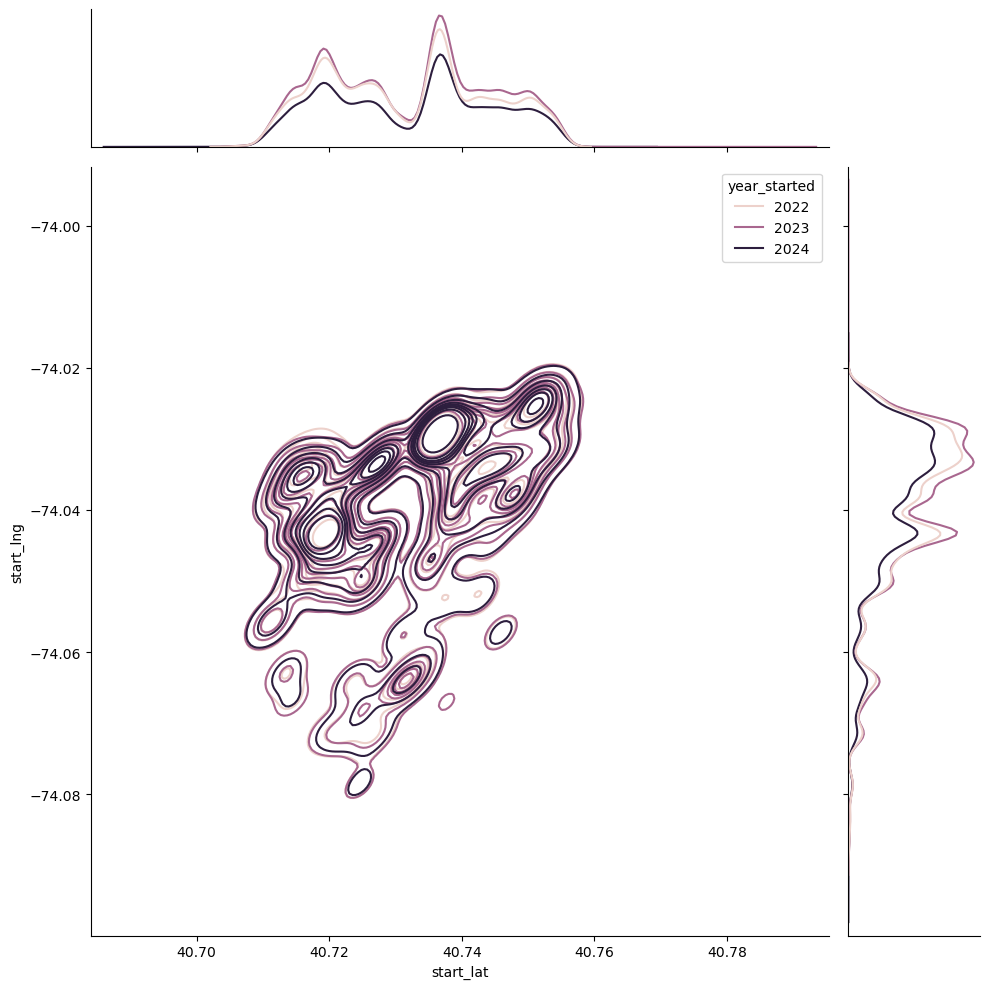

In [26]:
# plot heatmap of latitudes and longitudes
plt.figure(figsize=(10, 6))
sample_df  = df.sample(100000)
g = sns.jointplot(x=sample_df['start_lat'], y=sample_df['start_lng'], hue = sample_df['year_started'], kind = 'kde', height=10)
sns.despine()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

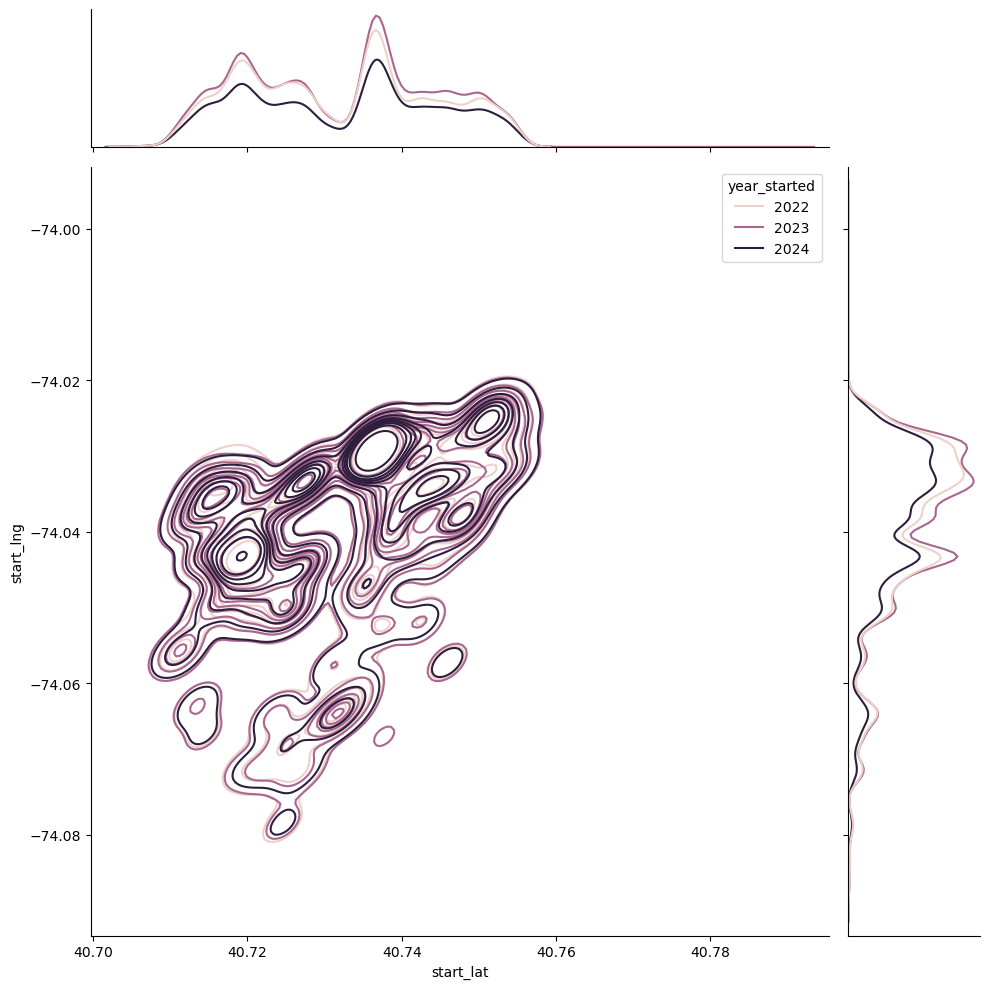

In [16]:
plt.figure(figsize=(10, 6))
sample_df = df.sample(100000)
sns.jointplot(x=sample_df['start_lat'], y=sample_df['start_lng'], hue = sample_df['year_started'], kind = 'kde', height=10)
sns.despine()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

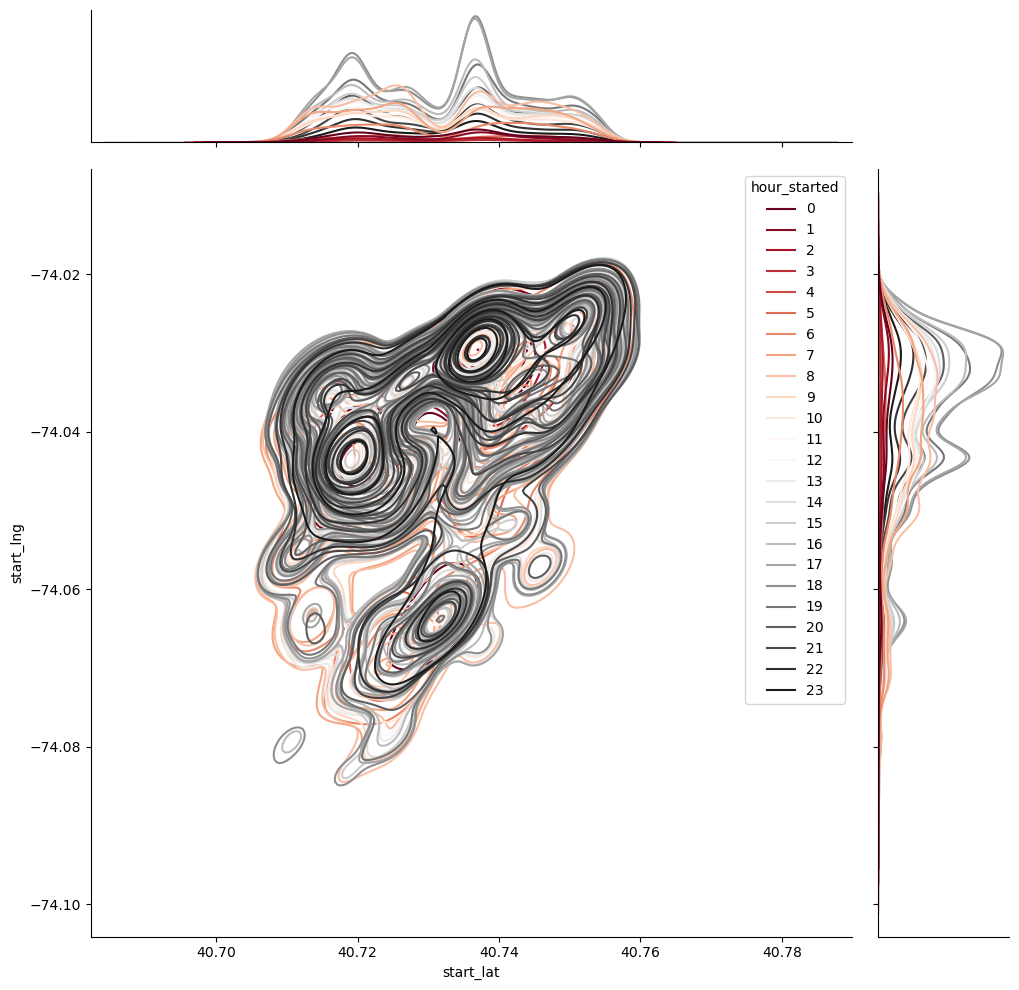

In [37]:
plt.figure(figsize=(10, 6))
sample_df  = df.sample(100000)
g = sns.jointplot(x=sample_df['start_lat'], y=sample_df['start_lng'], hue = sample_df['hour_started'], kind = 'kde', height=10, palette='RdGy')
sns.despine()
plt.show()

In [31]:
from IPython.display import display, HTML

# HTML to frame the visualizations
html = f"""
<table>
    <tr>
        <td><img src="{g.savefig('jointplot.png')}" width="400"></td>
        <td>{m._repr_html_()}</td>
    </tr>
</table>
"""
display(HTML(html))

In [40]:
from folium import plugins

map = folium.Map(location=[40.7128, -74.0060], tiles="Cartodb dark_matter", zoom_start=10)

heat_data = [[row['start_lat'], row['start_lng']] for index, row in sample_df.iterrows()]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map

<Figure size 1000x600 with 0 Axes>

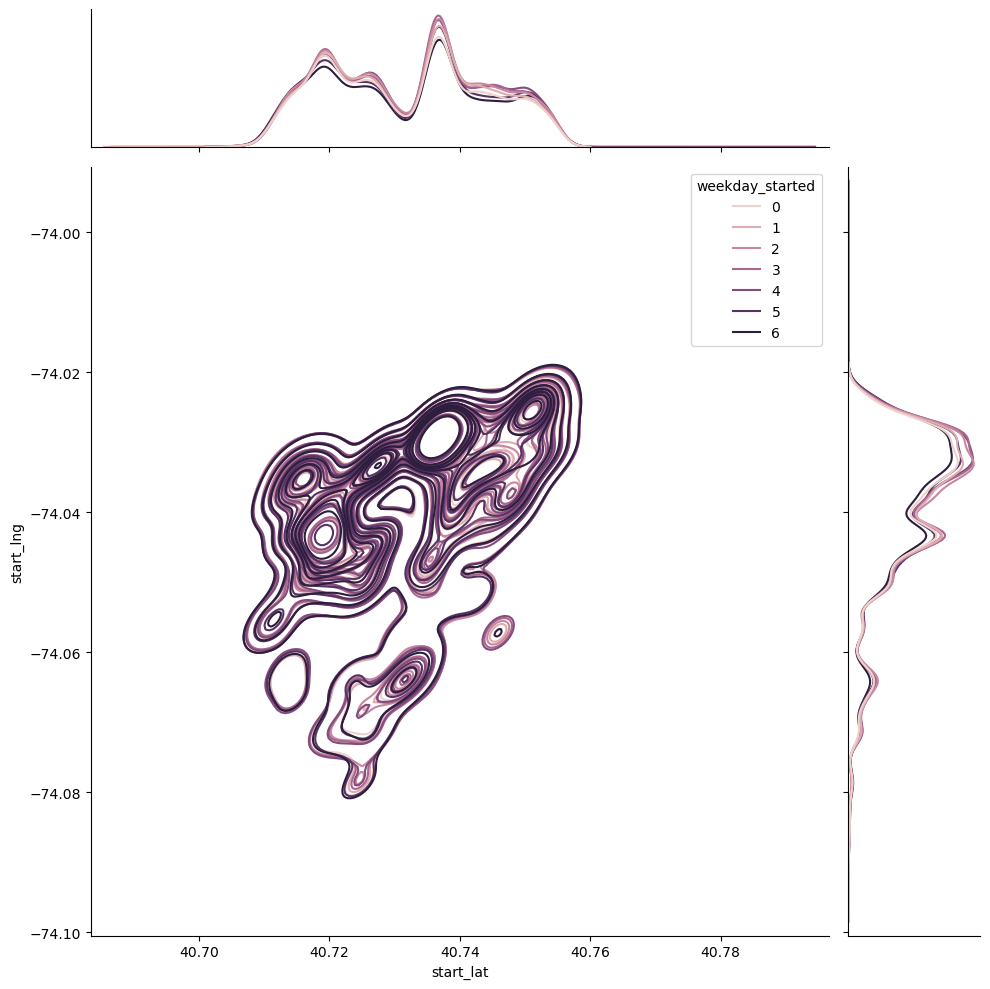

In [18]:
plt.figure(figsize=(10, 6))
sample_df  = df.sample(100000)
sns.jointplot(x=sample_df['start_lat'], y=sample_df['start_lng'], hue = sample_df['weekday_started'], kind = 'kde', height=10)
sns.despine()
plt.show()

<Figure size 1000x600 with 0 Axes>

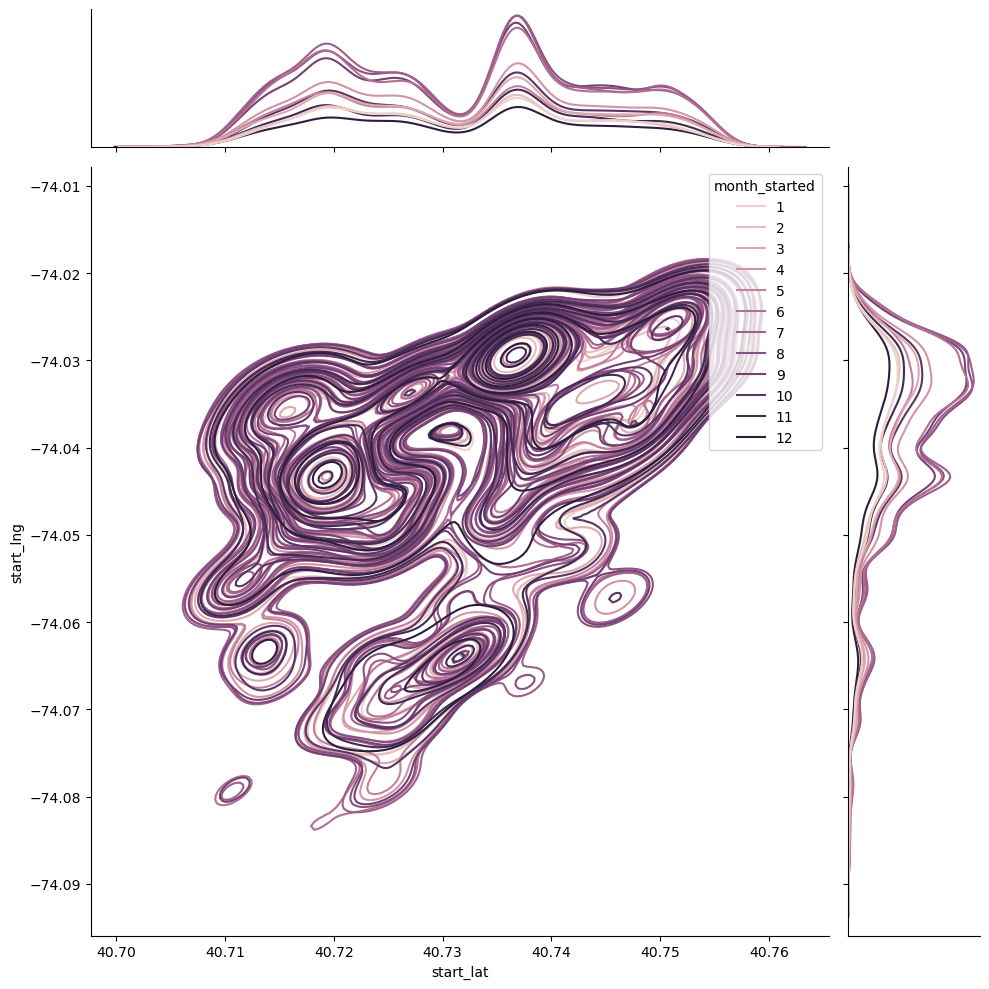

In [21]:
plt.figure(figsize=(10, 6))
sample_df  = df.sample(100000)
sns.jointplot(x=sample_df['start_lat'], y=sample_df['start_lng'], hue = sample_df['month_started'], kind = 'kde', height=10)
sns.despine()
plt.tight_layout()
plt.show()

In [9]:
df

ride_id  rideable_type              started_at  \
295082   11AA3AB3ED9FEFC5   classic_bike 2022-01-01 00:10:20.000   
312873   554FD61E00599BE2  electric_bike 2022-01-01 00:10:24.000   
312934   4D3D324F756B7103  electric_bike 2022-01-01 00:10:28.000   
295511   E26BB19DBC834216   classic_bike 2022-01-01 00:10:30.000   
298413   DC18B042AA415411   classic_bike 2022-01-01 00:11:31.000   
...                   ...            ...                     ...   
2153734  C4DB9DBFAD2B459B   classic_bike 2024-09-30 23:44:56.990   
2121596  21F199267AA38F84  electric_bike 2024-09-30 23:49:30.309   
2188254  D109CE13E404F10C  electric_bike 2024-09-30 23:54:25.742   
2194510  C15D23C97697A606  electric_bike 2024-09-30 23:56:04.032   
2194528  0BDCD0EE8105594E  electric_bike 2024-09-30 23:56:21.288   

                       ended_at          start_station_name start_station_id  \
295082  2022-01-01 00:19:29.000              Riverview Park            JC057   
312873  2022-01-01 00:14:06.000                     Sip Ave            JC056   
312934  2022-01-01 00:14:12.000                     Sip Ave            JC056   
295511  2022-01-01 00:24:30.000               Grove St PATH            JC005   
298413  2022-01-01 00:30:43.000  Columbus Dr at Exchange Pl            JC106   
...                         ...                         ...              ...   
2153734 2024-09-30 23:50:49.812                  Newark Ave            JC032   
2121596 2024-09-30 23:56:50.466                Newport PATH            JC066   
2188254 2024-09-30 23:57:54.026            Grand St & 14 St            HB506   
2194510 2024-09-30 23:59:28.193                Jersey & 3rd            JC074   
2194528 2024-09-30 23:59:56.414                Jersey & 3rd            JC074   

                      end_station_name end_station_id  start_lat  start_lng  \
295082                  Riverview Park          JC057  40.744319 -74.043991   
312873                    Glenwood Ave          JC094  40.730897 -74.063913   
312934                    Glenwood Ave          JC094  40.730897 -74.063913   
295511                    Newport Pkwy          JC008  40.719586 -74.043117   
298413      Columbus Dr at Exchange Pl          JC106  40.716870 -74.032810   
...                                ...            ...        ...        ...   
2153734                  Washington St          JC098  40.721525 -74.046305   
2121596                Christ Hospital          JC034  40.727224 -74.033759   
2188254  9 St HBLR - Jackson St & 8 St          HB305  40.754090 -74.031600   
2194510                 Van Vorst Park          JC035  40.723332 -74.045953   
2194528                 Van Vorst Park          JC035  40.723332 -74.045953   

           end_lat    end_lng member_casual  year_started  month_started  \
295082   40.744319 -74.043991        casual          2022              1   
312873   40.727551 -74.071061        member          2022              1   
312934   40.727551 -74.071061        member          2022              1   
295511   40.728745 -74.032108        member          2022              1   
298413   40.716870 -74.032810        casual          2022              1   
...            ...        ...           ...           ...            ...   
2153734  40.724294 -74.035483        member          2024              9   
2121596  40.734786 -74.050444        member          2024              9   
2188254  40.747907 -74.038412        member          2024              9   
2194510  40.718489 -74.047727        casual          2024              9   
2194528  40.718489 -74.047727        member          2024              9   

         day_started  weekday_started  hour_started  minute_started  \
295082             1                5             0              10   
312873             1                5             0              10   
312934             1                5             0              10   
295511             1                5             0              10   
298413             1   

In [14]:
df['start_lat']

295082     40.744319
312873     40.730897
312934     40.730897
295511     40.719586
298413     40.716870
             ...    
2153734    40.721525
2121596    40.727224
2188254    40.754090
2194510    40.723332
2194528    40.723332
Name: start_lat, Length: 2580874, dtype: float64

In [32]:
df = load_data(path)
df['started_at'] = pd.to_datetime(df['started_at'], format='ISO8601')
df['month'] = df['started_at'].dt.month
grouped_df = df.groupby('month')['start_station_name'].value_counts().reset_index(name='count')

In [77]:
df

ride_id  rideable_type              started_at  \
295511   E26BB19DBC834216   classic_bike 2022-01-01 00:10:30.000   
318313   95D98C7AE35192B6   classic_bike 2022-01-01 00:13:31.000   
318589   B42E6C17AF007611   classic_bike 2022-01-01 00:19:27.000   
312278   1D1BEA82F36906ED  electric_bike 2022-01-01 00:21:06.000   
305682   8AFC43B9B89D8FA7  electric_bike 2022-01-01 00:29:37.000   
...                   ...            ...                     ...   
2204561  6B72D199FC6E7531   classic_bike 2024-09-30 23:21:30.195   
2156270  AD2D5926699F812C   classic_bike 2024-09-30 23:23:07.279   
2183275  71E7EC271CC0711F   classic_bike 2024-09-30 23:23:49.085   
2161339  93DF3C30DDCF5F8F   classic_bike 2024-09-30 23:24:21.718   
2121596  21F199267AA38F84  electric_bike 2024-09-30 23:49:30.309   

                       ended_at                        start_station_name  \
295511  2022-01-01 00:24:30.000                             Grove St PATH   
318313  2022-01-01 00:18:56.000                              Newport PATH   
318589  2022-01-01 00:25:03.000   Hoboken Terminal - River St & Hudson Pl   
312278  2022-01-01 00:57:48.000          City Hall - Washington St & 1 St   
305682  2022-01-01 15:12:36.000          City Hall - Washington St & 1 St   
...                         ...                                       ...   
2204561 2024-09-30 23:42:05.631                             Hamilton Park   
2156270 2024-09-30 23:31:18.570  Hoboken Terminal - Hudson St & Hudson Pl   
2183275 2024-09-30 23:29:09.650  Hoboken Terminal - Hudson St & Hudson Pl   
2161339 2024-09-30 23:31:36.647          City Hall - Washington St & 1 St   
2121596 2024-09-30 23:56:50.466                              Newport PATH   

        start_station_id                            end_station_name  \
295511             JC005                                Newport Pkwy   
318313             JC066                               Hamilton Park   
318589             HB102                             Adams St & 2 St   
312278             HB105                             Adams St & 2 St   
305682             HB105                                  Newark Ave   
...                  ...                                         ...   
2204561            JC009           14 St Ferry - 14 St & Shipyard Ln   
2156270            HB101  Southwest Park - Jackson St & Observer Hwy   
2183275            HB101                            7 St & Monroe St   
2161339            HB105                             6 St & Grand St   
2121596            JC066                             Christ Hospital   

        end_station_id  start_lat  start_lng    end_lat    end_lng  \
295511           JC008  40.719586 -74.043117  40.728745 -74.032108   
318313           JC009  40.727224 -74.033759  40.727596 -74.044247   
318589           HB407  40.736068 -74.029127  40.739814 -74.036904   
312278           HB407  40.737360 -74.030970  40.739814 -74.036904   
305682           JC032  40.737360 -74.030970  40.721525 -74.046305   
...                ...        ...        ...        ...        ...   
2204561          HB202  40.727596 -74.044247  40.752961 -74.024353   
2156270          HB401  40.735938 -74.030305  40.737551 -74.041664   
2183275          HB304  40.735938 -74.030305  40.746413 -74.037977   
2161339          HB302  40.737360 -74.030970  40.744398 -74.034501   
2121596          JC034  40.727224 -74.033759  40.734786 -74.050444   

        member_casual  year_started  month_started  day_started  \
295511         member          2022              1            1   
318313         member          2022              1            1   
318589         member          2022              1            1   
312278         casual          2022              1            1   
305682         casual          2022              1            1   
...               ...           ...            ...          ...   
2204561        member          2024              9           30   
2156270        casual          202

In [44]:
df['start_station_name'].value_counts().head(10).index.tolist()

['Hoboken Terminal - River St & Hudson Pl',
 'Grove St PATH',
 'City Hall - Washington St & 1 St',
 'Hoboken Terminal - Hudson St & Hudson Pl',
 'Newport PATH',
 'South Waterfront Walkway - Sinatra Dr & 1 St',
 'Exchange Pl',
 'Hamilton Park',
 'Bergen Ave & Sip Ave',
 'Newport Pkwy']

In [61]:
month_count = df.groupby('month_started').count().reset_index()

In [67]:
month_count = df.groupby('month_started').size().reset_index(name = 'count')

In [68]:
month_count

month_started  count
0              1  14060
1              2  15386
2              3  18095
3              4  21767
4              5      8
5              6  30342
6              7  30299
7              8  29032
8              9  30910